In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("mushroom.csv")

In [4]:
df.head(2)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [5]:
df.columns = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

In [6]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [7]:
df.shape

(8123, 23)

In [8]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [12]:
pd.crosstab(df['class'],df['population'])

population,a,c,n,s,v,y
class,,,,,,
e,384,288,400,880,1192,1064
p,0,52,0,367,2848,648


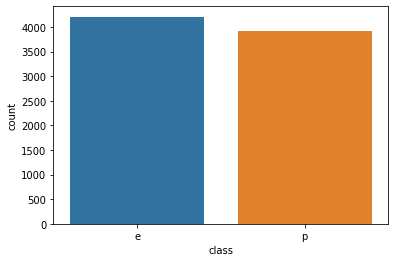

In [13]:
x=df['class']
ax=sns.countplot(x=x,data=df)

In [14]:
pd.crosstab(df['veil-type'],df['class'])

class,e,p
veil-type,,
p,4208,3915


In [15]:
pd.crosstab(df['class'],df['spore-print-color'])

spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48
p,0,1584,223,224,0,72,0,1812,0


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['class'])
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Class
0,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
1,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0


In [18]:
encoded_data=pd.get_dummies(df)
encoded_data.head(5)

,Class,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
y=df['class'].values.reshape(-1,1)
x=encoded_data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=52)

In [21]:
lg=LogisticRegression()

In [22]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

1.0


In [25]:
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

[[1382    0]
 [   0 1299]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1382
           p       1.00      1.00      1.00      1299

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [26]:
from sklearn.metrics import confusion_matrix

mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(mnb,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.89353846 1.         0.97292308 1.         0.63362069]
Mean Scores 0.9000164456233423
Standard deviation 0.1387929841560533
Y Prediction values
['e' 'e' 'e' ... 'e' 'p' 'p']


array([[3613,  595],
       [ 217, 3698]], dtype=int64)

In [27]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print('accuracy score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score= [1. 1. 1. 1. 1.]
Mean Scores 1.0
Standard deviation 0.0
Y Prediction values
['e' 'e' 'p' ... 'e' 'p' 'e']


array([[4208,    0],
       [   0, 3915]], dtype=int64)

In [28]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print('accuracy score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score= [1. 1. 1. 1. 1.]
Mean Scores 1.0
Standard deviation 0.0
Y Prediction values
['e' 'e' 'p' ... 'e' 'p' 'e']


array([[4208,    0],
       [   0, 3915]], dtype=int64)

In [29]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [1. 1. 1. 1. 1.]
Mean Scores 1.0
Standard deviation 0.0
Y Prediction values
['e' 'e' 'p' ... 'e' 'p' 'e']


array([[4208,    0],
       [   0, 3915]], dtype=int64)

In [30]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print('accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score: [0.93353846 1.         0.99938462 1.         0.8817734 ]
Mean Scores 0.962939295187571
Standard deviation 0.048015757345788584
Y Prediction values
['e' 'e' 'e' ... 'e' 'p' 'e']


array([[4016,  192],
       [ 109, 3806]], dtype=int64)

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [32]:
from sklearn.externals import joblib
joblib.dump(sv,'svmushroom.obj')
rfr_from_joblib=joblib.load('svmushroom.obj')